In [1]:
from dataset import MyData
from model import Net
from config import device
from helper import make_gif

import torch
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt

Selected devie is cuda:0


# Initializations of dataset and model

## Dataset

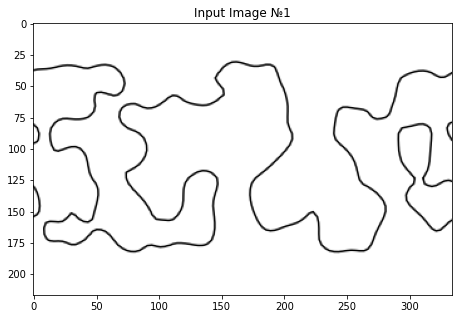

In [2]:
dataset1 = MyData(path_or_img='./CloC/00006.png', data_mode='path', mode_3d='cylinder', radius=1, reduce_fctor=1, need_info=False)
# dataset2 = MyData(path_to_file='../imgs/2.png', mode='img', mode_3d='cylinder', radius=10, reduce_fctor=1, need_help=False)

dataset_list = [dataset1]
dataset1.show_image()

## Model

In [3]:
model = Net(dataset_list=dataset_list, lr=1e-3)
model.to(device)
# summary(model, input_size=(sum(len(x) for x in model.data_list), 3))
# model.load_state_dict(torch.load('./3_cascade_1904.pt'))

Net(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=6, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=6, out_features=12, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=12, out_features=24, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=24, out_features=1, bias=True)
    (7): Tanh()
  )
)

## Show start state

In [ ]:
prediction_list = model.test_model(threshold = 0.15, need_plot=True)

In [ ]:
model.show_3d(prediction_list=prediction_list, map_number=0)

# Training and testing of model

## Training the model

#### Training loop

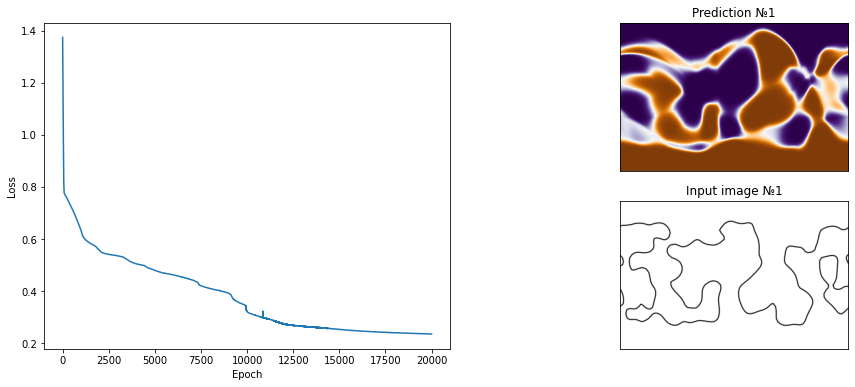

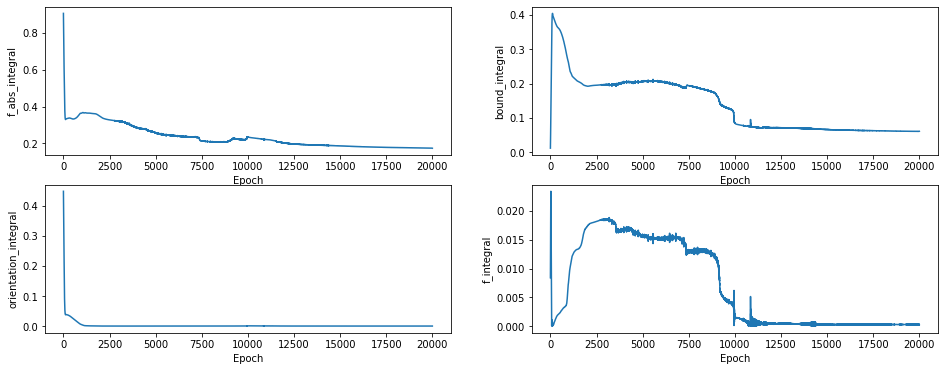

In [5]:
# model.change_lr(1e-3)
# model = model.restart_model(lr=1e-3)
model.start_training(num_epochs=20e+3, my_weight=0.1, need_save=False, need_plot=True)
# model.show_loss_items()

#### Save state dict of model

In [6]:
model.save_state_dict('./state_dict/test.pt')

#### Make gif

In [6]:
make_gif(path_to_imgs='./imgs/epoch_outs', path_to_save='./imgs', gifname='res')

## Testing the model

#### Test

In [ ]:
prediction_list = model.test_model(need_plot=True)

#### Gradient map

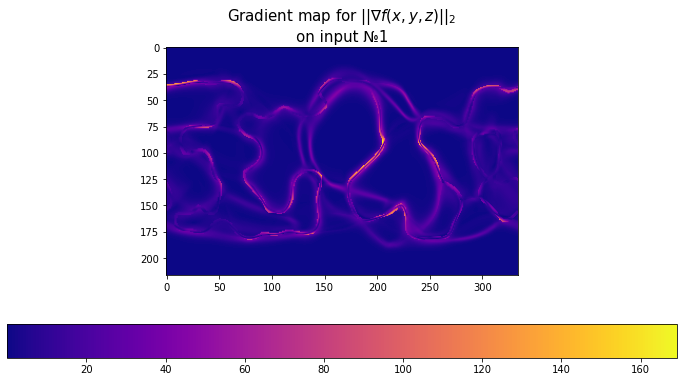

In [50]:
_, grad_map_list = model.compute_and_plot_gradient()

#### 3d plot

In [ ]:
model.show_3d(prediction_list=prediction_list, map_number=0)